In [1]:
import pandas as pd
stock=pd.read_csv("st.csv")
news=pd.read_csv("news.csv")

In [2]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-07-12,3390.340088,3459.370117,3384.739990,3452.750000,3452.750000,0.0
1,2001-07-13,3470.939941,3513.790039,3438.030029,3453.989990,3453.989990,0.0
2,2001-07-16,3453.629883,3478.110107,3427.820068,3434.830078,3434.830078,0.0
3,2001-07-17,3414.060059,3440.290039,3397.649902,3431.929932,3431.929932,0.0
4,2001-07-18,3434.939941,3446.179932,3377.580078,3383.409912,3383.409912,0.0


In [3]:
news.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [4]:
news["publish_date"]=news["publish_date"].astype(str)

In [5]:
news["publish_date"]=pd.to_datetime(news["publish_date"],infer_datetime_format=True)

In [6]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
publish_date         datetime64[ns]
headline_category    object
headline_text        object
dtypes: datetime64[ns](1), object(2)
memory usage: 75.5+ MB


In [7]:
news["headline_category"].value_counts()

india                      285619
unknown                    207732
city.mumbai                132649
city.delhi                 124658
business.india-business    115246
                            ...  
actresses                       7
sports.headline3                7
did-you-know                    6
sports.headline6                3
party-manifestos                2
Name: headline_category, Length: 1016, dtype: int64

In [8]:
t=news.loc[news["headline_category"]=="business.india-business"]

In [9]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115246 entries, 276 to 3297124
Data columns (total 3 columns):
publish_date         115246 non-null datetime64[ns]
headline_category    115246 non-null object
headline_text        115246 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 3.5+ MB


In [10]:
t.drop(["headline_category"],axis=1,inplace=True)

E:\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
t.head()

,publish_date,headline_text
276,2001-01-04,Car dealers caught in Bihar sales tax ruling
4500,2001-05-22,Re-negotiation best: Deshmukh; lenders' SOS to...
4567,2001-05-22,Samsung says hello to cellular unit in India
4574,2001-05-22,Govt lifts port-linked curbs on imports
4587,2001-05-22,RIL plans to mop up to Rs 1;000cr


In [12]:
tt=pd.DataFrame(t)

In [13]:
tt.columns=["DATE","Headline"]

In [14]:
tt=tt.set_index(['DATE'])

In [15]:
tt.head()

,Headline
DATE,
2001-01-04,Car dealers caught in Bihar sales tax ruling
2001-05-22,Re-negotiation best: Deshmukh; lenders' SOS to...
2001-05-22,Samsung says hello to cellular unit in India
2001-05-22,Govt lifts port-linked curbs on imports
2001-05-22,RIL plans to mop up to Rs 1;000cr


In [16]:
tt.tail()

,Headline
DATE,
2020-06-30,HDFC Bank looks to raise up to Rs 50;000 crore
2020-06-30,19% of MSMEs eligible for govt guarantee in hi...
2020-06-30,'Legends on Unacademy' to be on Times Now; ET Now
2020-06-30,Key Covid-19 drugs to be hit by customs checks...
2020-06-30,Top ministers discuss 'ban' on Chinese 5G equi...


In [17]:
tt=tt.groupby(tt.index).sum()

In [18]:
tt["Headline"].iloc[1]

"Re-negotiation best: Deshmukh; lenders' SOS to CentreSamsung says hello to cellular unit in IndiaGovt lifts port-linked curbs on importsRIL plans to mop up to Rs 1;000crEicher crashes into the red; to cut 200 jobsIndo Rama posts Rs18cr netJet; Sahara to wait & watch"

In [19]:
tt.head()

,Headline
DATE,
2001-01-04,Car dealers caught in Bihar sales tax ruling
2001-05-22,Re-negotiation best: Deshmukh; lenders' SOS to...
2001-05-28,Auto body drives in new classification normsAr...
2001-05-29,Ashok Leyland to cut jobs; divisions'Fixing of...
2001-05-30,Beware; the snoopware is watching you!IA dives...


In [20]:
len(tt)

6863

In [21]:
import datetime

In [22]:
tt = tt[tt.index.date > datetime.date(2001,7,11)]

In [23]:
tt.iloc[:20]

,Headline
DATE,
2001-07-12,Bharti Cellular reduces airtime tariff for 'Ma...
2001-07-13,Dupont on expansion drive in IndiaEssel sells ...
2001-07-14,Wilful defaulters should be sent to jail: Sinh...
2001-07-15,Indo-Myanmar border trade decliningMilitancy r...
2001-07-16,Rs 28 cr Citigroup funding for DakshFIIs net b...
2001-07-17,TELCO among top 10 losersRupee gains against $...
2001-07-18,Relief for investors with 3;000+ units soonCoc...
2001-07-19,Bids for 4th cellular slot receivedHyundai Son...
2001-07-20,Govt may raise cess on petrol; dieselRBI favou...


In [24]:
len(tt)

6845

In [25]:
tt.tail()

,Headline
DATE,
2020-06-26,Preferential offers get more pricing options f...
2020-06-27,'Ashok Leyland independent biz; won't be impac...
2020-06-28,Ordinance to let RBI revive banks without mora...
2020-06-29,Techtonic Review: The OnePlus 8 and OnePlus 8 ...
2020-06-30,Solar plan to make Leh self-reliant hanging fi...


In [26]:
tt["Headline"].iloc[6844]

"Solar plan to make Leh self-reliant hanging fire over free powerTata Steel hit by Rs 1;236 crore loss in Q4Nivea to review its products; marketing amid movement against racismHDFC Bank looks to raise up to Rs 50;000 crore19% of MSMEs eligible for govt guarantee in high-risk category'Legends on Unacademy' to be on Times Now; ET NowKey Covid-19 drugs to be hit by customs checks at portsTop ministers discuss 'ban' on Chinese 5G equipment"

In [27]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-07-12,3390.340088,3459.370117,3384.739990,3452.750000,3452.750000,0.0
1,2001-07-13,3470.939941,3513.790039,3438.030029,3453.989990,3453.989990,0.0
2,2001-07-16,3453.629883,3478.110107,3427.820068,3434.830078,3434.830078,0.0
3,2001-07-17,3414.060059,3440.290039,3397.649902,3431.929932,3431.929932,0.0
4,2001-07-18,3434.939941,3446.179932,3377.580078,3383.409912,3383.409912,0.0


In [28]:
len(stock)

4731

In [29]:
stock[:50]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-07-12,3390.340088,3459.370117,3384.739990,3452.750000,3452.750000,0.0
1,2001-07-13,3470.939941,3513.790039,3438.030029,3453.989990,3453.989990,0.0
2,2001-07-16,3453.629883,3478.110107,3427.820068,3434.830078,3434.830078,0.0
3,2001-07-17,3414.060059,3440.290039,3397.649902,3431.929932,3431.929932,0.0
4,2001-07-18,3434.939941,3446.179932,3377.580078,3383.409912,3383.409912,0.0
5,2001-07-19,3372.919922,3380.270020,3352.120117,3370.929932,3370.929932,0.0
6,2001-07-20,3375.820068,3389.489990,3331.419922,3340.750000,3340.750000,0.0
7,2001-07-23,3340.889893,3340.889893,3310.949951,3330.979980,3330.979980,0.0
8,2001-07-24,3326.840088,3340.909912,3306.169922,3335.080078,3335.080078,0.0
9,2001-07-25,3307.159912,3338.219971,3296.429932,3301.969971,3301.969971,0.0


In [30]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4731 entries, 0 to 4730
Data columns (total 7 columns):
Date         4731 non-null object
Open         4662 non-null float64
High         4662 non-null float64
Low          4662 non-null float64
Close        4662 non-null float64
Adj Close    4662 non-null float64
Volume       4662 non-null float64
dtypes: float64(6), object(1)
memory usage: 258.9+ KB


In [31]:
stock.fillna(method='ffill',inplace=True)

In [32]:
stock["Date"]=pd.to_datetime(stock["Date"],infer_datetime_format=True)

In [33]:
stock=stock.set_index(['Date'])

In [34]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-07-12,3390.340088,3459.370117,3384.739990,3452.750000,3452.750000,0.0
2001-07-13,3470.939941,3513.790039,3438.030029,3453.989990,3453.989990,0.0
2001-07-16,3453.629883,3478.110107,3427.820068,3434.830078,3434.830078,0.0
2001-07-17,3414.060059,3440.290039,3397.649902,3431.929932,3431.929932,0.0
2001-07-18,3434.939941,3446.179932,3377.580078,3383.409912,3383.409912,0.0


In [35]:
tt.head()

,Headline
DATE,
2001-07-12,Bharti Cellular reduces airtime tariff for 'Ma...
2001-07-13,Dupont on expansion drive in IndiaEssel sells ...
2001-07-14,Wilful defaulters should be sent to jail: Sinh...
2001-07-15,Indo-Myanmar border trade decliningMilitancy r...
2001-07-16,Rs 28 cr Citigroup funding for DakshFIIs net b...


In [36]:
news=pd.DataFrame(tt)

In [37]:
news.head()

,Headline
DATE,
2001-07-12,Bharti Cellular reduces airtime tariff for 'Ma...
2001-07-13,Dupont on expansion drive in IndiaEssel sells ...
2001-07-14,Wilful defaulters should be sent to jail: Sinh...
2001-07-15,Indo-Myanmar border trade decliningMilitancy r...
2001-07-16,Rs 28 cr Citigroup funding for DakshFIIs net b...


In [11]:
stock["Date"]=pd.to_datetime(stock["Date"],infer_datetime_format=True)

In [12]:
stock=stock.set_index(['Date'])

In [13]:
stock.fillna(method='ffill',inplace=True)

In [14]:
stock=stock[['Close','Open', 'High', 'Low','Adj Close','Volume']]

In [15]:
tttt=pd.concat([news,stock], 1).dropna()


In [16]:
tttt

,Headline,Close,Open,High,Low,Adj Close,Volume
2001-07-12,Bharti Cellular reduces airtime tariff for 'Ma...,3452.750000,3390.340088,3459.370117,3384.739990,3452.750000,0.0
2001-07-13,Dupont on expansion drive in IndiaEssel sells ...,3453.989990,3470.939941,3513.790039,3438.030029,3453.989990,0.0
2001-07-16,Rs 28 cr Citigroup funding for DakshFIIs net b...,3434.830078,3453.629883,3478.110107,3427.820068,3434.830078,0.0
2001-07-17,TELCO among top 10 losersRupee gains against $...,3431.929932,3414.060059,3440.290039,3397.649902,3431.929932,0.0
2001-07-18,Relief for investors with 3;000+ units soonCoc...,3383.409912,3434.939941,3446.179932,3377.580078,3383.409912,0.0
...,...,...,...,...,...,...,...
2020-06-23,N Chandrasekaran appointed on RBI board againY...,35430.429688,35015.730469,35482.160156,34843.691406,35430.429688,25200.0
2020-06-24,IT stocks shrug off H-1B jittersFinmin calls m...,34868.980469,35679.738281,35706.550781,34794.929688,34868.980469,26600.0
2020-06-25,Truck firms look for new export markets to sel...,34842.101563,34525.390625,35081.609375,34499.781250,34842.101563,24600.0
2020-06-26,Preferential offers get more pricing options f...,35171.269531,35144.781250,35254.878906,34910.339844,35171.269531,24800.0


In [17]:
ttty=tttt.copy()

In [18]:
ttty.drop(["Headline"],axis=1,inplace=True)


In [19]:
stock=pd.DataFrame(ttty)

In [20]:
tttt.drop(["Open","High","Low","Adj Close","Volume"],axis=1,inplace=True)

In [21]:
news=pd.DataFrame(tttt)

In [22]:
news.head()

,Headline,Close
2001-07-12,Bharti Cellular reduces airtime tariff for 'Ma...,3452.750000
2001-07-13,Dupont on expansion drive in IndiaEssel sells ...,3453.989990
2001-07-16,Rs 28 cr Citigroup funding for DakshFIIs net b...,3434.830078
2001-07-17,TELCO among top 10 losersRupee gains against $...,3431.929932
2001-07-18,Relief for investors with 3;000+ units soonCoc...,3383.409912


In [23]:
stock.head()

,Close,Open,High,Low,Adj Close,Volume
2001-07-12,3452.750000,3390.340088,3459.370117,3384.739990,3452.750000,0.0
2001-07-13,3453.989990,3470.939941,3513.790039,3438.030029,3453.989990,0.0
2001-07-16,3434.830078,3453.629883,3478.110107,3427.820068,3434.830078,0.0
2001-07-17,3431.929932,3414.060059,3440.290039,3397.649902,3431.929932,0.0
2001-07-18,3383.409912,3434.939941,3446.179932,3377.580078,3383.409912,0.0


In [24]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

Text(0.5, 0, 'open')

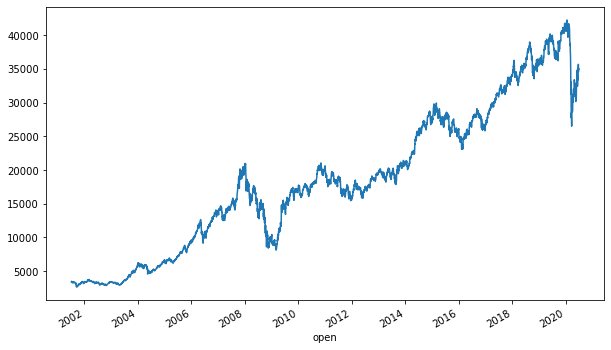

In [25]:
stock["Open"].plot()
plt.xlabel("open")

Text(0.5, 0, 'High')

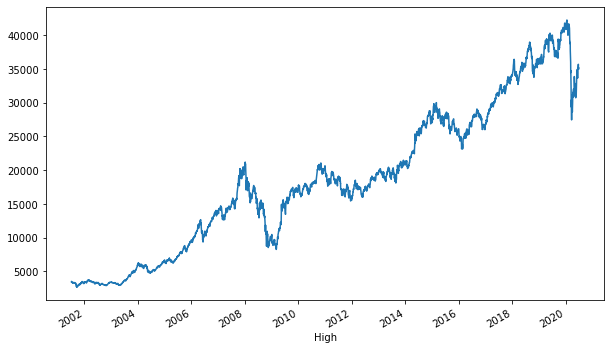

In [26]:
stock["High"].plot()
plt.xlabel("High")

Text(0.5, 0, 'Low')

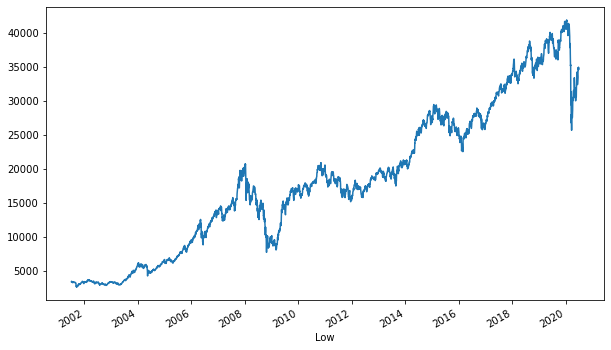

In [27]:
stock["Low"].plot()
plt.xlabel("Low")

Text(0.5, 0, 'Close')

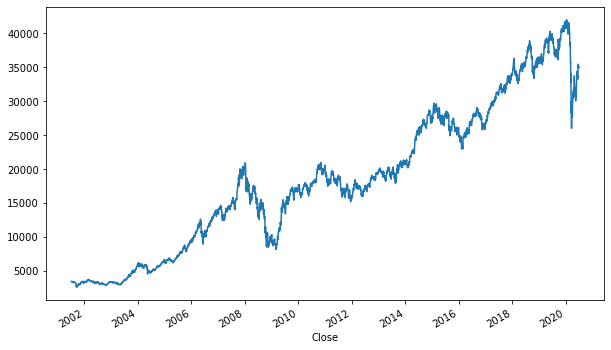

In [28]:
stock["Close"].plot()
plt.xlabel("Close")

Text(0.5, 0, 'Volume')

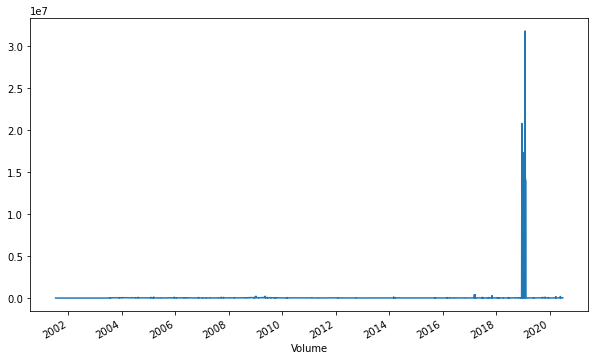

In [29]:
stock["Volume"].plot()
plt.xlabel("Volume")

In [30]:
stock.drop(["Adj Close"],axis=1,inplace=True)

In [31]:
stock.head()

,Close,Open,High,Low,Volume
2001-07-12,3452.750000,3390.340088,3459.370117,3384.739990,0.0
2001-07-13,3453.989990,3470.939941,3513.790039,3438.030029,0.0
2001-07-16,3434.830078,3453.629883,3478.110107,3427.820068,0.0
2001-07-17,3431.929932,3414.060059,3440.290039,3397.649902,0.0
2001-07-18,3383.409912,3434.939941,3446.179932,3377.580078,0.0


In [32]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scale=scale.fit(stock)
data=scale.transform(stock)

In [33]:
def sss(w):
    t1,t2=w.shape
    a=[]
    t={}
    for i in range(t2):
        for j in range(t1):
                a.append(w[j][i])
        ss=pd.Series(a)
        t.update({i:ss})
        a=[]
    k=[]
    for i,j in t.items():
        k.append(j)
    ww=pd.concat(k,axis=1)
    n=len(ww.columns)
    for i in range(n):
         ww[n+i]=ww[i].shift(-1)
    return ww
    

In [34]:
w=sss(data)

In [35]:
w

,0,1,2,3,4,5,6,7,8,9
0,0.021666,0.019385,0.019620,0.020121,0.000000,0.021698,0.021418,0.020995,0.021479,0.000000
1,0.021698,0.021418,0.020995,0.021479,0.000000,0.021211,0.020982,0.020093,0.021219,0.000000
2,0.021211,0.020982,0.020093,0.021219,0.000000,0.021137,0.019984,0.019138,0.020450,0.000000
3,0.021137,0.019984,0.019138,0.020450,0.000000,0.019904,0.020510,0.019287,0.019939,0.000000
4,0.019904,0.020510,0.019287,0.019939,0.000000,0.019587,0.018946,0.017622,0.019290,0.000000
...,...,...,...,...,...,...,...,...,...,...
4694,0.834262,0.817178,0.828454,0.821513,0.000792,0.819995,0.833928,0.834122,0.820270,0.000836
4695,0.819995,0.833928,0.834122,0.820270,0.000836,0.819312,0.804808,0.818337,0.812752,0.000773
4696,0.819312,0.804808,0.818337,0.812752,0.000773,0.827677,0.820433,0.822714,0.823210,0.000780
4697,0.827677,0.820433,0.822714,0.823210,0.000780,0.822347,0.814938,0.817093,0.816886,0.000575


In [36]:
w.fillna(method='ffill',inplace=True)

In [37]:
w.drop([6,7,8,9],axis=1,inplace=True)

In [38]:
w

,0,1,2,3,4,5
0,0.021666,0.019385,0.019620,0.020121,0.000000,0.021698
1,0.021698,0.021418,0.020995,0.021479,0.000000,0.021211
2,0.021211,0.020982,0.020093,0.021219,0.000000,0.021137
3,0.021137,0.019984,0.019138,0.020450,0.000000,0.019904
4,0.019904,0.020510,0.019287,0.019939,0.000000,0.019587
...,...,...,...,...,...,...
4694,0.834262,0.817178,0.828454,0.821513,0.000792,0.819995
4695,0.819995,0.833928,0.834122,0.820270,0.000836,0.819312
4696,0.819312,0.804808,0.818337,0.812752,0.000773,0.827677
4697,0.827677,0.820433,0.822714,0.823210,0.000780,0.822347


In [39]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4699 entries, 0 to 4698
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4699 non-null   float64
 1   1       4699 non-null   float64
 2   2       4699 non-null   float64
 3   3       4699 non-null   float64
 4   4       4699 non-null   float64
 5   5       4699 non-null   float64
dtypes: float64(6)
memory usage: 220.4 KB


In [40]:
www=w.values

In [41]:
xtrain,xtest,ytrain,ytest=www[:3759,0:5],www[3759:,0:5],www[:3759,-1],www[3759:,-1]

In [42]:
xtes=xtest

In [43]:
xtes

array([[6.56935240e-01, 6.49587260e-01, 6.52912946e-01, 6.56424774e-01,
        3.26888804e-04],
       [6.56206203e-01, 6.51777911e-01, 6.53332220e-01, 6.57023666e-01,
        5.28051146e-04],
       [6.58966609e-01, 6.52777653e-01, 6.54158929e-01, 6.58068655e-01,
        3.77179390e-04],
       ...,
       [8.19311969e-01, 8.04808459e-01, 8.18337231e-01, 8.12751768e-01,
        7.73217749e-04],
       [8.27676568e-01, 8.20433415e-01, 8.22713688e-01, 8.23210415e-01,
        7.79504072e-04],
       [8.22346539e-01, 8.14938311e-01, 8.17093271e-01, 8.16885651e-01,
        5.75198569e-04]])

In [44]:
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1], 1)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Dropout,SpatialDropout1D
from keras.layers import Bidirectional

In [46]:
model=Sequential()
model.add(Bidirectional(LSTM(100,activation="relu",input_shape=(xtrain.shape[1],xtrain.shape[2]))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [47]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50,batch_size=32,verbose=2)


Epoch 1/50
118/118 - 3s - loss: 0.0125 - val_loss: 7.8872e-04
Epoch 2/50
118/118 - 3s - loss: 3.9125e-05 - val_loss: 5.8532e-04
Epoch 3/50
118/118 - 2s - loss: 3.7252e-05 - val_loss: 5.0056e-04
Epoch 4/50
118/118 - 3s - loss: 3.6069e-05 - val_loss: 5.2113e-04
Epoch 5/50
118/118 - 2s - loss: 3.7297e-05 - val_loss: 4.6091e-04
Epoch 6/50
118/118 - 3s - loss: 3.6720e-05 - val_loss: 4.9511e-04
Epoch 7/50
118/118 - 3s - loss: 3.6048e-05 - val_loss: 5.8911e-04
Epoch 8/50
118/118 - 2s - loss: 3.6012e-05 - val_loss: 5.5779e-04
Epoch 9/50
118/118 - 2s - loss: 3.6159e-05 - val_loss: 5.3553e-04
Epoch 10/50
118/118 - 2s - loss: 3.9725e-05 - val_loss: 5.0878e-04
Epoch 11/50
118/118 - 3s - loss: 3.6900e-05 - val_loss: 4.6261e-04
Epoch 12/50
118/118 - 3s - loss: 3.6880e-05 - val_loss: 4.3844e-04
Epoch 13/50
118/118 - 2s - loss: 3.6944e-05 - val_loss: 4.3052e-04
Epoch 14/50
118/118 - 2s - loss: 3.6662e-05 - val_loss: 4.6538e-04
Epoch 15/50
118/118 - 3s - loss: 4.0347e-05 - val_loss: 4.0088e-04
Epoch 16

In [48]:
y_pred=model.predict(xtest)

In [49]:
y_pred[:5]

array([[0.6535414 ],
       [0.65416807],
       [0.6556008 ],
       [0.66351324],
       [0.6676962 ]], dtype=float32)

In [50]:
from numpy import concatenate

In [51]:
y_pred=concatenate((y_pred,xtes[:, 1:]), axis=1)

In [52]:
xtes[:5]

array([[6.56935240e-01, 6.49587260e-01, 6.52912946e-01, 6.56424774e-01,
        3.26888804e-04],
       [6.56206203e-01, 6.51777911e-01, 6.53332220e-01, 6.57023666e-01,
        5.28051146e-04],
       [6.58966609e-01, 6.52777653e-01, 6.54158929e-01, 6.58068655e-01,
        3.77179390e-04],
       [6.70297783e-01, 6.56121374e-01, 6.65065884e-01, 6.63256185e-01,
        5.72055408e-04],
       [6.68985030e-01, 6.66322915e-01, 6.66440920e-01, 6.70390003e-01,
        6.22345993e-04]])

In [53]:
y_pred[:5]

array([[6.53541386e-01, 6.49587260e-01, 6.52912946e-01, 6.56424774e-01,
        3.26888804e-04],
       [6.54168069e-01, 6.51777911e-01, 6.53332220e-01, 6.57023666e-01,
        5.28051146e-04],
       [6.55600786e-01, 6.52777653e-01, 6.54158929e-01, 6.58068655e-01,
        3.77179390e-04],
       [6.63513243e-01, 6.56121374e-01, 6.65065884e-01, 6.63256185e-01,
        5.72055408e-04],
       [6.67696178e-01, 6.66322915e-01, 6.66440920e-01, 6.70390003e-01,
        6.22345993e-04]])

In [54]:
y_pred = scale.inverse_transform(y_pred)

In [55]:
ypred= y_pred[:,0]
y_pred[:5]

array([[28318.61325856, 28372.25      , 28532.25      , 28363.099609  ,
        10400.        ],
       [28343.27481608, 28459.089844  , 28548.849609  , 28386.609375  ,
        16800.        ],
       [28399.65581837, 28498.720703  , 28581.580078  , 28427.630859  ,
        12000.        ],
       [28711.03085158, 28631.269531  , 29013.400391  , 28631.269531  ,
        18200.        ],
       [28875.63982853, 29035.669922  , 29067.839844  , 28911.310547  ,
        19800.        ]])

In [56]:
ytest = ytest.reshape((len(ytest), 1))

In [57]:
ytest[:5]

array([[0.6562062 ],
       [0.65896661],
       [0.67029778],
       [0.66898503],
       [0.67200694]])

In [58]:
ytest= concatenate((ytest,xtes[:, 1:]), axis=1)

In [59]:
y_test = scale.inverse_transform(ytest)

In [60]:
y_test=y_test[:,0]
y_test[:5]

array([28423.480469, 28532.109375, 28978.019531, 28926.359375,
       29045.279297])

In [61]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,ypred))

832.6181775253636

In [62]:
y_test[10:20]

array([28634.5     , 28523.199219, 28507.419922, 28773.130859,
       28668.220703, 28294.279297, 28223.699219, 28292.810547,
       27827.529297, 27865.960938])

In [63]:
ypred[10:20]

array([28487.57565483, 28521.34749287, 28485.31450384, 28441.15169188,
       28665.30822073, 28621.24861483, 28344.84167174, 28189.0099012 ,
       28156.1716089 , 27999.10136563])

In [64]:
import re
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [65]:
news.isnull().any()

Headline    False
Close       False
dtype: bool

In [66]:
tweettoken = TweetTokenizer(strip_handles=True, reduce_len=True)

In [67]:
lemmatizer=WordNetLemmatizer()

In [68]:
stemmer=PorterStemmer()

In [69]:
collect=[]
def preprocess(t,kpc):
    tee=re.sub('[^a-zA-Z]'," ",t)
    tee=tee.lower()
    res=tweettoken.tokenize(tee)
    for i in res:
        if i in stopwords.words('english'):
            res.remove(i)
    rest=[]
    for k in res:
        rest.append(lemmatizer.lemmatize(k))
    ret=" ".join(rest)
    if kpc==1:
        collect.append(ret)
    elif kpc==0:
        collecttest.append(ret)


In [70]:
def splitpro(t,q,m):
         for j in range(q):
                 preprocess(t["Headline"].iloc[j],m)

In [71]:
len(news)

4699

In [72]:
splitpro(news,4699,1)

In [73]:
collect[:5]

['bharti cellular reduces airtime tariff magic ongc nod increasing production major fieldsrupee end barely changed dollaressar slash airtime tariff cash card',
 'dupont expansion drive indiaessel sell lakh zee share u investormore bad news growth frontcontrols sugar industry go soon shantashourie denies favouring tatas air india biduti package likely today maharaja fly chennai hk directinvestor protection fund likely next weekhc issue contempt notice netware infosysbiocon transcorp technology battlegovt may amend act allow rbi lower slrinvestors urge centre intervene u scheme',
 'r cr citigroup funding dakshfiis net buyer equity r croreuti offer limited exit announce nav janspice talk cellphone major mergernri industrialist optimistic indo pak summitindian language bridge digital gulfsmall uti investor heave sigh reliefentreprenuer vanguard growthgdp projected grow cmierbi governor say economy good shapeinflation rise active govt role needed tackle fakestextile policy envisages export 

In [74]:
news.head()

,Headline,Close
2001-07-12,Bharti Cellular reduces airtime tariff for 'Ma...,3452.750000
2001-07-13,Dupont on expansion drive in IndiaEssel sells ...,3453.989990
2001-07-16,Rs 28 cr Citigroup funding for DakshFIIs net b...,3434.830078
2001-07-17,TELCO among top 10 losersRupee gains against $...,3431.929932
2001-07-18,Relief for investors with 3;000+ units soonCoc...,3383.409912


In [75]:
val=news["Close"].values

In [76]:
val

array([ 3452.75    ,  3453.98999 ,  3434.830078, ..., 34842.101563,
       35171.269531, 34961.519531])

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import xgboost


In [78]:
def tfidf(xx):
    cv=TfidfVectorizer(max_features=2000)
    x=cv.fit_transform(xx).toarray()
    return x

In [79]:
y=tfidf(collect)

In [80]:
len(y[0][:])

2000

In [81]:
y[:2]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
val

array([ 3452.75    ,  3453.98999 ,  3434.830078, ..., 34842.101563,
       35171.269531, 34961.519531])

In [83]:
x_traiN,x_tesT,y_traiN,y_tesT=y[:3759],y[3759:],val[:3759],val[3759:]

In [84]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_traiN, y_traiN)

LinearRegression()

In [85]:
lin_reg.score(x_tesT,y_tesT)

-3.710353690694991e+24

In [86]:
y_preD=lin_reg.predict(x_tesT)

In [87]:
y_tesT

array([28452.169922, 28423.480469, 28532.109375, 28978.019531,
       28926.359375, 29045.279297, 28797.25    , 28353.539063,
       28372.230469, 28412.890625, 28599.029297, 28634.5     ,
       28523.199219, 28507.419922, 28773.130859, 28668.220703,
       28294.279297, 28223.699219, 28292.810547, 27827.529297,
       27865.960938, 28243.289063, 28334.550781, 28220.980469,
       28106.210938, 28061.140625, 28082.339844, 27643.109375,
       27673.599609, 27529.970703, 28050.880859, 27984.369141,
       28129.839844, 28077.179688, 28179.080078, 28091.419922,
       27836.509766, 27915.900391, 27941.509766, 27876.609375,
       27527.220703, 27430.279297, 27274.150391, 27458.990234,
       27591.140625, 27252.529297, 27517.679688, 26818.820313,
       26304.630859, 26298.689453, 26227.619141, 26150.240234,
       25765.140625, 25960.779297, 26051.810547, 25860.169922,
       26316.339844, 26350.169922, 26394.009766, 26652.810547,
       26559.919922, 26230.660156, 26349.099609, 26392.

In [88]:
y_preD[:5]

array([25987.35081722, 27363.38189865, 24398.84539772, 18431.21582315,
       21088.18296745])

In [89]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_tesT,y_preD))

7944646195914292.0

In [90]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_traiN,y_traiN)
tree_pred=tree_reg.predict(x_tesT)
np.sqrt(mean_squared_error(y_tesT,tree_pred))

20782.43934320662

In [91]:
xgb=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=40,
             min_child_weight=25, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [92]:
xgb.fit(x_traiN,y_traiN)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=40,
             min_child_weight=25, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [93]:
xgb.score(x_tesT,y_tesT)

-18.421968216731788

In [94]:
len(x_traiN)

3759

In [95]:
len(xtrain)

3759

In [96]:
y_prednlp=xgb.predict(x_tesT)

In [97]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_tesT,y_prednlp))

18176.636632858375

In [98]:
y_prednlp[:5]

array([26813.123, 22742.367, 10868.667, 21863.344, 20029.938],
      dtype=float32)

In [99]:
ypred[:5]

array([28318.61325856, 28343.27481608, 28399.65581837, 28711.03085158,
       28875.63982853])

In [100]:
yp=[]
for i in range(940):
    a=y_prednlp[i]+ypred[i]
    b=(a/2)
    yp.append(b)

In [101]:
yp

[27565.86815271579,
 25542.821001788234,
 19634.161405278333,
 25287.18730079136,
 24452.788664265325,
 26285.336250786815,
 27020.178757787966,
 25981.309909283562,
 25203.397715748877,
 25382.386862324813,
 24065.791733663515,
 27268.706949559404,
 25198.66604098385,
 25653.912760002095,
 27661.700985367395,
 26680.3879792914,
 23950.3261093064,
 26915.58209903956,
 25833.83482788784,
 25647.554589064348,
 22650.90710928673,
 25970.08944286885,
 26008.890063055136,
 23617.58613648402,
 24389.293856227465,
 22363.428844604863,
 24571.22517528648,
 23128.328441643553,
 22518.732274034657,
 23583.337968188345,
 25388.709857758,
 24838.20869556802,
 26392.731736134127,
 24828.210883447326,
 22322.37552292404,
 21688.933365864286,
 24466.997514800394,
 23898.691208582604,
 22310.54359621248,
 25679.850974039604,
 24787.160429349482,
 24074.1600384181,
 22523.28832791458,
 21954.85558106704,
 23966.959421328473,
 23936.353372256563,
 22671.715681265847,
 22870.279707034177,
 24955.43436567

In [102]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(yp,y_tesT))

8945.607732188615